In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt
import cv2
from PIL import Image as img

#### Henter bilder og disparities

In [3]:


BRYGGE_SEKVENS = "./bilder/brygge_sekvens"
BRO_SEKVENS = "./bilder/bro_sekvens"
LAGRA_BILDER = ".bilder/lagra_bilete"
RESULT_FOLDER = BRYGGE_SEKVENS

K = np.loadtxt(f"{RESULT_FOLDER}/left/K_matrix.txt")
R = np.loadtxt(f"{RESULT_FOLDER}/left/R_matrix.txt")
T = np.loadtxt(f"{RESULT_FOLDER}/left/T_matrix.txt")

plt.ion()

# Under åpner vi ti = n'te bildet
left_images_filenames = list(filter(lambda fn: fn.split(".")[-1]=="png", os.listdir(f"{RESULT_FOLDER}/left")))
timestamps = list(map(lambda fn: fn.split(".")[0], left_images_filenames))
ti = 0
timestamp = timestamps[ti]
left = cv2.imread(f"{RESULT_FOLDER}/left/{timestamp}.png")
right = cv2.imread(f"{RESULT_FOLDER}/right/{timestamp}.png")
disp = np.array(cv2.imread(f"{RESULT_FOLDER}/disp_zed/{timestamp}.png", cv2.IMREAD_ANYDEPTH) / 256.0, dtype=np.float32)

print("Første:" ,timestamps[0], " Nærme: ", timestamps[len(timestamps)-1])

def fetch_image(main_as_well=False, RES_FOLDER=RESULT_FOLDER, time=timestamp):

    plt.ion()
    new_main_image = cv2.imread(f"{RES_FOLDER}/left/{time}.png")
    new_disparity_image = np.array(cv2.imread(f"{RES_FOLDER}/disp_zed/{time}.png", cv2.IMREAD_ANYDEPTH) / 256.0, dtype=np.float32)
    if(main_as_well):
        return new_disparity_image, new_main_image
    return new_disparity_image

# Timestamps
# Første: 1689072599961543541  Nærme:  1689072633388130541 Bru:  1689068851836122093 Båt: 1689068854381001093
Første= 1689072599961543541  
Nærme=  1689072633388130541
Bru =  1689068851836122093
Båt =  1689068854381001093
 

# Fetch a new current working image and respective disparity
# Dette er disp_første og venstre_første
#current_working_disparity, current_working_image = fetch_image(True)

# Dette er disp_nærme_brygga og nærme_brygga
current_working_disparity, current_working_image = fetch_image(True, RES_FOLDER=BRYGGE_SEKVENS ,time=Første)
første_disparity, første_image = fetch_image(True, RES_FOLDER=BRYGGE_SEKVENS ,time=Første)
nærme_disparity, nærme_image = fetch_image(True, RES_FOLDER=BRYGGE_SEKVENS, time=Nærme)
bru_disparity, bru_image = fetch_image(True, RES_FOLDER=BRO_SEKVENS, time=Bru)


Første: 1689072633388130541  Nærme:  1689072600363349541


In [4]:
""" # Plot for the disparity value down a single column of a chosen image 

disparity_map = dispCloseUp

#column_index = disparity_map.shape[1] // 2
column_index = 500

column_data = disparity_map[:, column_index]

y_values = range(len(column_data))

plt.figure()
plt.plot(column_data, y_values)
plt.gca().invert_yaxis()  # Invert y-axis to match image orientation
plt.xlabel('Disparity Value')
plt.ylabel('Image Y-Axis')
plt.title('Disparity Values Along a Column')
plt.show() """

" # Plot for the disparity value down a single column of a chosen image \n\ndisparity_map = dispCloseUp\n\n#column_index = disparity_map.shape[1] // 2\ncolumn_index = 500\n\ncolumn_data = disparity_map[:, column_index]\n\ny_values = range(len(column_data))\n\nplt.figure()\nplt.plot(column_data, y_values)\nplt.gca().invert_yaxis()  # Invert y-axis to match image orientation\nplt.xlabel('Disparity Value')\nplt.ylabel('Image Y-Axis')\nplt.title('Disparity Values Along a Column')\nplt.show() "

In [5]:

count = 0
def interpolate_column(column):
    # Indices of valid and invalid elements
    # Adds the indices of values that are valid meaning real numbers to valid_indices and invalid indices meaning inf, -inf and NaN to 
    valid_mask = np.isfinite(column)
    valid_indices = np.where(valid_mask)[0]
    invalid_indices = np.where(~valid_mask)[0]

    # Check if we have enough data for interpolation
    if len(valid_indices) == 0:
        # No valid data in this column
        print("No valid data")
        return column
    elif len(invalid_indices) == 0:
        # No need for interpolation
        print("Not Necessary")
        return column

    #count +=1 
    # Interpolate invalid data points
    valid_data = column[valid_mask]
    column[~valid_mask] = np.interp(invalid_indices, valid_indices, valid_data)
    return column

def interpolate_each_column(dI):
    # Applying the interpolation to each column
    height, width = dI.shape
    for x in range(width):
        dI[:, x] = interpolate_column(dI[:, x])

Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Ne

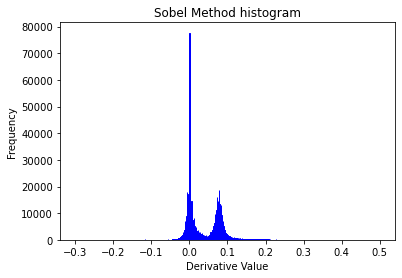

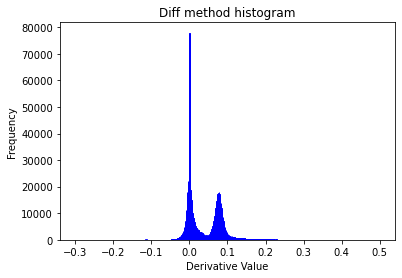

In [6]:

n = 15  # Size of the kernel, as Vipul used in his thesis 5
kernel_k = np.ones(n) / n  # Kernel for averaging

# Gaussian kernel:
n_gaussian = 15  # Size of the kernel
sigma = 2.0  # Standard deviation for the Gaussian kernel

def gaussian_kernel(size, std_dev):
    if size % 2 == 0:
        size += 1
    x = np.arange(-size//2 + 1, size//2 + 1)
    kernel = np.exp(-(x**2) / (2 * std_dev**2))
    kernel = kernel / kernel.sum()  # Normalize the kernel
    return kernel

kernel_k_gaussian = gaussian_kernel(n_gaussian, sigma)

# Function to apply low-pass filter to a column
def low_pass_filter(column, K=kernel_k):
    # Apply convolution
    filtered_column = np.convolve(column, K, mode='same')
    return filtered_column

# Velg disparity bilde her!
#
#dI = båt_test_disp
dI = nærme_disparity

interpolate_each_column(dI)

# This is manually doing the above cell
# Apply the low-pass filter to each column
height, width = dI.shape
df = np.zeros_like(dI)  # Low-pass filtered disparity image
for x in range(width):
    df[:, x] = low_pass_filter(dI[:, x], K=kernel_k)


# Versjon 1 bruker sobel Kernel til å derivere
# Define the 1D Sobel kernelS
kernel_m = np.array([1, 0, -1])

# Initialize an array to store the vertical derivative image
vertical_derivative = np.zeros_like(df)

# Apply the Sobel kernel to each column
""" for i in range(df.shape[1]):  # Iterate over columns
    vertical_derivative[:, i] = np.convolve(df[:, i], kernel_m, mode='same') """

for i in range(df.shape[1]):  # Iterate over columns
    vertical_derivative[:, i] = np.convolve(df[:, i], kernel_m, mode='same') / 2



# Versjon 2 bruker np.diff 
# Computing the derivative of each column
df_derivative = np.diff(df, axis=0)

# Padding to handle size difference after np.diff
df_derivative = np.pad(df_derivative, ((0, 1), (0, 0)), mode='edge')
#første_df_derivative = np.pad(df_derivative, ((0, 1), (0, 0)), mode='edge') 



# Input should be a disparity image where each column is differentiated
def flatten_and_plot_histogram(df_derivative, plot=True,title="Histogram of Derivative Values", input_bins=2000):
    # Flatten the array of derivatives to a 1D array
    flattened_derivatives = df_derivative.flatten()

    if(plot):
        # Plot the histogram
        plt.figure()
        plt.hist(flattened_derivatives, bins=input_bins, range=(-0.3,0.5), color='blue', edgecolor='blue')
        plt.title(title)
        plt.xlabel('Derivative Value')
        plt.ylabel('Frequency')
        # Show the plot
        plt.show()
    
    return flattened_derivatives
    

# Versjon 1 Sobel
flattened_derivatives_sobel = flatten_and_plot_histogram(vertical_derivative, title="Sobel Method histogram")

# Versjon 2 np.diff
flattened_derivatives_diff = flatten_and_plot_histogram(df_derivative, title="Diff method histogram")

#flattened_derivatives = flattened_derivatives_sobel

flattened_derivatives = flattened_derivatives_diff

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[ 0. ]
 [ 0. ]
 [ 0. ]
 ...
 [-0.3]
 [-0.3]
 [-0.3]]


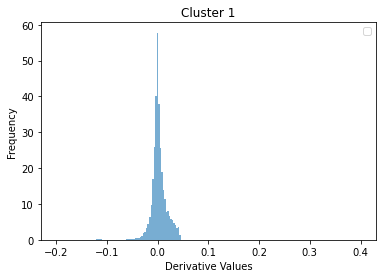

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


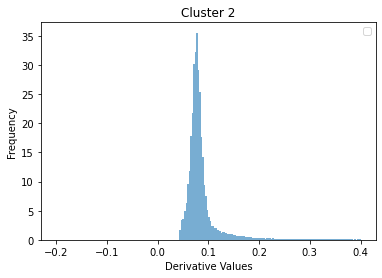

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


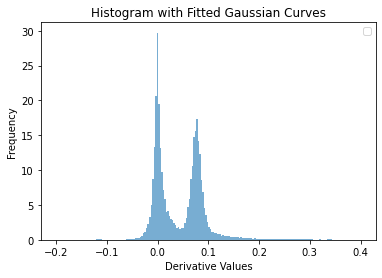

<class 'numpy.ndarray'>
mode:  [0.078125]


In [17]:
from sklearn.cluster import KMeans
from scipy import stats

def gaussian(x, mean, stddev):
    return (1 / (stddev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / stddev) ** 2)

# Gaussian fit function
def fit_gaussian(data):
    mean = np.mean(data)
    stddev = np.std(data)
    return mean, stddev

def clustering(flattened_derivatives, guess1=[0.0], guess2=[0.06], a_mini=-0.3, a_maxi=0.5, clusters=2):
    # Clipping the data to be between -0.3 and 0.5
    clipped_derivatives = np.clip(flattened_derivatives, a_min=a_mini, a_max=a_maxi)

    # Reshape data for KMeans
    clustering_model = clipped_derivatives.reshape(-1, 1)
    
    # Initial guesses for cluster centers (approximated from histogram peaks)
    initial_centers = np.array([guess1, guess2])  # replace peak1, peak2 with your estimates

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=clusters, init=initial_centers, n_init=1)
    kmeans.fit(clustering_model)

    # Get the labels and cluster centers
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    return clustering_model, clipped_derivatives, labels, centers

def clusteringV2(flattened_derivatives, guess1=[0.0], guess2=[0.06], a_mini=-0.3, a_maxi=0.5, clusters=2):
    # Clipping the data to be between -0.3 and 0.5
    clipped_derivatives = np.clip(flattened_derivatives, a_min=a_mini, a_max=a_maxi)

    # Reshape data for KMeans
    clustering_model = clipped_derivatives.reshape(-1, 1)
    
    # Initial guesses for cluster centers (approximated from histogram peaks)
    initial_centers = np.array([guess1, guess2])  # replace peak1, peak2 with your estimates

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=clusters, init='k-means++', n_init=10)
    kmeans.fit(clustering_model)

    # Get the labels and cluster centers
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    return clustering_model, clipped_derivatives, labels, centers

# Sobel versjon
#clustering_model, labels, centers = clustering(flattened_derivatives_sobel, guess1=[0.0], guess2=[0.15])
# Diff
clustering_model, clipped_derivatives, labels, centers = clusteringV2(flattened_derivatives_diff, guess1=[0.0], guess2=[0.1])

# Relocation the mean to match the mode for a more accurate distribution

cluster1 = clustering_model[labels == 0]
cluster2 = clustering_model[labels == 1]

print(cluster1)

plt.figure()
plt.hist(cluster1, bins=200, range=(-0.2, 0.4), density=True, alpha=0.6)
plt.xlabel('Derivative Values')
plt.ylabel('Frequency')
plt.title('Cluster 1')
plt.legend()
plt.show()

# Plot histogram 
plt.figure()
plt.hist(cluster2, bins=200, range=(-0.2, 0.4), density=True, alpha=0.6)
plt.xlabel('Derivative Values')
plt.ylabel('Frequency')
plt.title('Cluster 2')
plt.legend()
plt.show()

plt.figure()
plt.hist(clustering_model, bins=200, range=(-0.2, 0.4), density=True, alpha=0.6)
plt.xlabel('Derivative Values')
plt.ylabel('Frequency')
plt.title('Histogram with Fitted Gaussian Curves')
plt.legend()
plt.show()

mode_result = stats.mode(cluster2)
print(type(mode_result.mode))

print("mode: ", stats.mode(cluster2).mode[0])


#print("mean: ",np.mean(cluster1))
#print("mode: ", stats.mode(cluster1).mode)


Mean 1:  -0.0022602384
Stddev 1:  0.02
Mean 2:  0.09120861
Stddev 2:  0.02
Mode 1:  [0.]
Mode 2:  [0.078125]


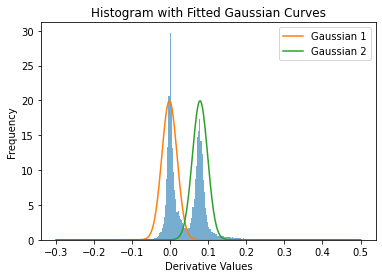

In [35]:

# Fit Gaussian to each cluster
mean1, stddev1 = fit_gaussian(cluster1)
mean2, stddev2 = fit_gaussian(cluster2)
stddev1, stddev2 = 0.02, 0.02
print("Mean 1: ",mean1)
print("Stddev 1: ",stddev1)
print("Mean 2: ",mean2)
print("Stddev 2: ",stddev2)
print("Mode 1: ", stats.mode(cluster1).mode[0])
print("Mode 2: ", stats.mode(cluster2).mode[0])
mean2 = stats.mode(cluster2).mode[0]


# Below are the upper and lower bounds
# Assuming you have mean1, stddev1, mean2, stddev2 from the Gaussian fits
k = 2.5 # Adjust this constant as needed

""" shift_amount = 0.02  # Adjust this value to shift the curve to the left
# Adjust mean2 for Gaussian Curve 2
adjusted_mean2 = mean2 - shift_amount
mean2 = mean2 - shift_amount 
#gaussian_curve2Adjust = gaussian(x_values, adjusted_mean2, stddev2)
"""

# Calculate range limits for each Gaussian curve
dL1 = mean1 - k * stddev1
dU1 = mean1 + k * stddev1
dL2 = mean2 - k * stddev2
dU2 = mean2 + k * stddev2

# Create a range of x values
x_values = np.linspace(-0.3, 0.5, 400)



# Gaussian curves
gaussian_curve1 = gaussian(x_values, mean1, stddev1)
gaussian_curve2 = gaussian(x_values, mean2, stddev2)


# Plot histogram and Gaussian curves
plt.figure()
plt.hist(clipped_derivatives, bins=200, range=(-0.2, 0.4), density=True, alpha=0.6)
plt.plot(x_values, gaussian_curve1, label='Gaussian 1')
plt.plot(x_values, gaussian_curve2, label='Gaussian 2')
plt.xlabel('Derivative Values')
plt.ylabel('Frequency')
plt.title('Histogram with Fitted Gaussian Curves')
plt.legend()
plt.show()

In [36]:
# And dL1, dU1, dL2, dU2 are the range limits for the two Gaussians
classification_map = np.empty(df_derivative.shape, dtype=object)

include_undecided_label = True

if(include_undecided_label):
    print("includes undecided")
    for i in range(df_derivative.shape[0]):  # Rows
        for j in range(df_derivative.shape[1]):  # Columns
            derivative_value = df_derivative[i, j]

            # Check if the derivative value falls into the range of either Gaussian
            if (dL1 <= derivative_value <= dU1) and (dL2 <= derivative_value <= dU2):
                classification = 'undecided'
            elif dL1 <= derivative_value <= dU1:
                classification = 'upright' 
            elif dL2 <= derivative_value <= dU2:
                 classification = 'horizontal'  
            else:
                classification = 'unknown'

            classification_map[i, j] = classification
else:
    print("Does not include undecided")
    for i in range(df_derivative.shape[0]):  # Rows
        for j in range(df_derivative.shape[1]):  # Columns
            derivative_value = df_derivative[i, j]

            # Check if the derivative value falls into the range of either Gaussian
            if dL1 <= derivative_value <= dU1:
                classification = 'upright'
            elif dL2 <= derivative_value <= dU2:
                classification = 'horizontal'
            else:
                classification = 'unknown'

            classification_map[i, j] = classification

print(df_derivative)
print(classification_map)

includes undecided
[[ 0.4255209   0.423177    0.42161465 ...  0.23749995  0.2421875
   0.24765635]
 [ 0.4294269   0.42682314  0.4247396  ...  0.2309897   0.23463559
   0.23958325]
 [ 0.4312501   0.42838526  0.4265623  ...  0.22760415  0.23046875
   0.23463535]
 ...
 [-3.4281254  -3.4242191  -3.4187508  ... -3.2937489  -3.2919254
  -3.2882805 ]
 [-3.4302082  -3.427084   -3.4236984  ... -3.301302   -3.301302
  -3.2966156 ]
 [-3.4302082  -3.427084   -3.4236984  ... -3.301302   -3.301302
  -3.2966156 ]]
[['unknown' 'unknown' 'unknown' ... 'unknown' 'unknown' 'unknown']
 ['unknown' 'unknown' 'unknown' ... 'unknown' 'unknown' 'unknown']
 ['unknown' 'unknown' 'unknown' ... 'unknown' 'unknown' 'unknown']
 ...
 ['unknown' 'unknown' 'unknown' ... 'unknown' 'unknown' 'unknown']
 ['unknown' 'unknown' 'unknown' ... 'unknown' 'unknown' 'unknown']
 ['unknown' 'unknown' 'unknown' ... 'unknown' 'unknown' 'unknown']]


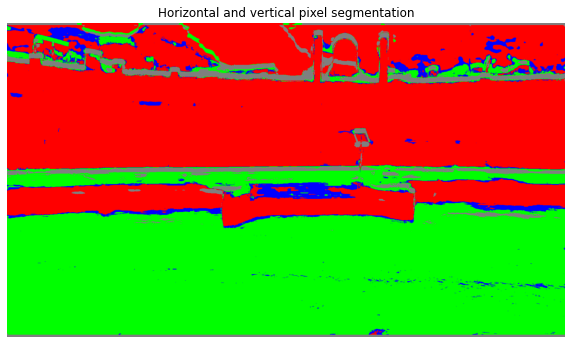

In [37]:
# Define colors for each classification
colors = {
    'undecided': [0, 0, 1], # Blue
    'upright': [1, 0, 0],  # Red
    'horizontal': [0, 1, 0],  # Green
    'unknown': [0.5, 0.5, 0.5]  # Gray
}

def assign_colours_and_plot(classification_map, colors=colors, plot=True, title="Pixel-wise Disparity Map Classification"):
    # Create an empty array for the color-coded image
    color_coded_image = np.zeros((*classification_map.shape, 3))

    # Assign colors
    for classification, color in colors.items():
        mask = classification_map == classification
        color_coded_image[mask] = color

    if(plot):
        plt.figure(figsize=(10, 6))
        plt.imshow(color_coded_image)
        plt.title(title)
        plt.axis('off')  # Hide the axes
        plt.show()

# Nærme
#display_disp_image(nærme_image)
# Båt
#display_disp_image(båt_test_bilde)
assign_colours_and_plot(classification_map, title="Horizontal and vertical pixel segmentation")

In [38]:
surface_splitting_disparity_image = nærme_disparity

vertCount = 0
horCount = 0
noneCount = 0

# Verticals
vertical_Derivative_List = []
vertical_Disp_List = []
vertical_Obj_List = []


#Horizonals
horizontal_Derivative_List = []
horizontal_Disp_List = []
horizontal_Obj_List = []


for i in range(classification_map.shape[0]):  # Rows
    for j in range(classification_map.shape[1]):  # Columns

        current_local_value = classification_map[i, j]

        if(current_local_value == 'upright'):
            vertCount += 1
            vertical_Derivative_List.append(df_derivative[i,j])
            appendObjectVert = [surface_splitting_disparity_image[i, j], i, j, 'label']
            vertical_Disp_List.append(surface_splitting_disparity_image[i,j])
            vertical_Obj_List.append(appendObjectVert)
        
        
        
        elif(current_local_value == 'horizontal'):
            horCount += 1
            der_val = df_derivative[i, j]
            horizontal_Derivative_List.append(der_val)
            # Object = [Disparity value, vertical derivative value, i coordinate, j coordinate, label]
            appendObjectHor = [surface_splitting_disparity_image[i, j], der_val, i, j, 'horizontal']
            horizontal_Disp_List.append(surface_splitting_disparity_image[i,j])
            horizontal_Obj_List.append(appendObjectHor)

        else:
            noneCount+=1

print("verticals: ", vertCount)
print("Horizontals: ", horCount)
print("Unknown: ", noneCount)

verticals:  972172
Horizontals:  908938
Unknown:  192490


972172


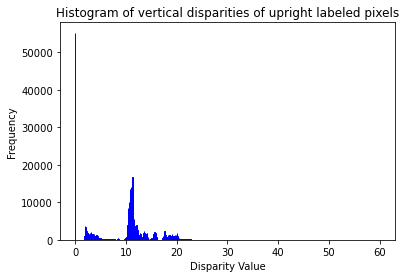

In [39]:
print(len(vertical_Derivative_List))

input_bins=2000
plot= True
title = 'Histogram of vertical disparities of upright labeled pixels'
histRange = (-0.3,0.5)

#to_be_plotted = verticalDerivativeList
#to_be_plotted = df_derivative.flatten()
to_be_plotted =vertical_Disp_List
histRange = (0,60)
if(plot):
    # Plot the histogram
    plt.figure()
    plt.hist(to_be_plotted, bins=input_bins, range=histRange, color='blue', edgecolor='blue')
    plt.title(title)
    plt.xlabel('Disparity Value')
    plt.ylabel('Frequency')
    # Show the plot
    plt.show()


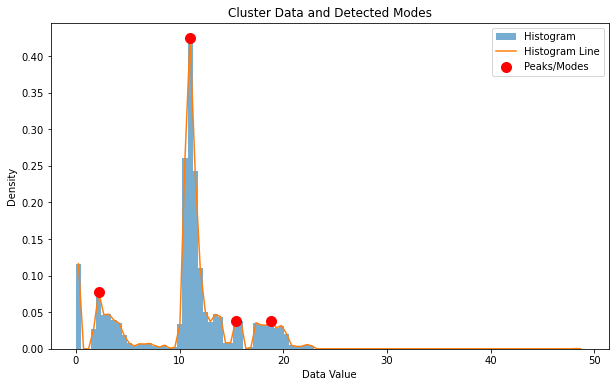

Detected modes at: [ 2.2018359 11.00918   15.412851  18.837929 ]


In [86]:
from scipy.signal import find_peaks
def plot_histogram_with_peaks(data, bins, min_prominence=0.01, min_distance=1):
    hist, bin_edges = np.histogram(data, bins=bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Get bin centers for plotting

    # Find peaks with adjusted parameters
    peaks, properties = find_peaks(hist, prominence=min_prominence, distance=min_distance)

    # Plotting the histogram and peaks
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=bins, alpha=0.6, label='Histogram', density=True)
    plt.plot(bin_centers, hist, label='Histogram Line')
    plt.scatter(bin_centers[peaks], hist[peaks], color='red', s=100, zorder=5, label='Peaks/Modes')
    plt.title('Cluster Data and Detected Modes')
    plt.xlabel('Data Value')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    # Print peak bin centers
    peak_values = bin_centers[peaks]
    print("Detected modes at:", peak_values)
    return peak_values

# Call the function with parameters adjusted based on your description
detected_modes = plot_histogram_with_peaks(vertical_Disp_List, bins=100, min_prominence=0.02, min_distance=1)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


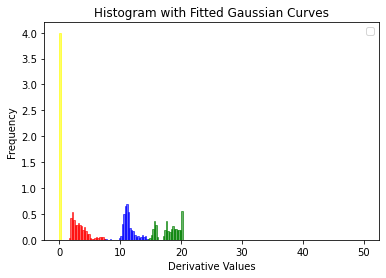

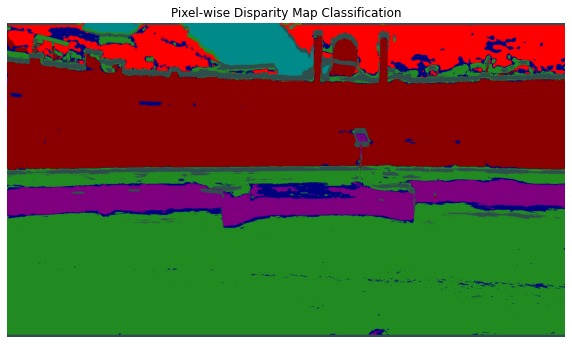

In [70]:


def clusteringVerticalSurfaces(flattened_derivatives, guess1=[0.0], guess2=[3], guess3=[7], guess4=[10], a_mini=-0.3, a_maxi=20, clusters=4, onlyThree=False):
    # Clipping the data to be between -0.3 and 0.5
    clipped_derivatives = np.clip(flattened_derivatives, a_min=a_mini, a_max=a_maxi)

    # Reshape data for KMeans
    clustering_model = clipped_derivatives.reshape(-1, 1)
    
    # Initial guesses for cluster centers (approximated from histogram peaks)
    if(onlyThree):
        initial_centers = np.array([guess1, guess2, guess3])
        clusters = 3
    else: 
        initial_centers = np.array([guess1, guess2, guess3, guess4])  # replace peak1, peak2 with your estimates

    # Perform K-means clustering
    #kmeans = KMeans(n_clusters=clusters, init=initial_centers,n_init=2)
    kmeans = KMeans(n_clusters=clusters, init='k-means++', n_init='auto')
    kmeans.fit(clustering_model)

    # Get the labels and cluster centers
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    return clustering_model, clipped_derivatives, labels, centers


doOnlyThree = False
clustering_model, clipped_derivatives, labels, centers = clusteringVerticalSurfaces(vertical_Disp_List, onlyThree = doOnlyThree)

# Separate the data into two clusters
cluster1 = clustering_model[labels == 0]
cluster2 = clustering_model[labels == 1]
cluster3 = clustering_model[labels == 2]
if(not doOnlyThree):
    cluster4 = clustering_model[labels == 3]


# Plot histogram and Gaussian curves
plt.figure()
plt.hist(cluster1, bins=200, range=(0, 50), density=True, alpha=0.6, color='blue', edgecolor='blue')
plt.hist(cluster2, bins=200, range=(0, 50), density=True, alpha=0.6, color='red', edgecolor='red')
plt.hist(cluster3, bins=200, range=(0, 50), density=True, alpha=0.6, color='green', edgecolor='green')
if(not doOnlyThree):
    plt.hist(cluster4, bins=200, range=(0, 50), density=True, alpha=0.6, color='yellow', edgecolor='yellow')
#plt.plot(x_values, gaussian_curve1, label='Gaussian 1')
#plt.plot(x_values, gaussian_curve2, label='Gaussian 2')
plt.xlabel('Derivative Values')
plt.ylabel('Frequency')
plt.title('Histogram with Fitted Gaussian Curves')
plt.legend()
plt.show()

#----------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Create classmap
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------


for i, obj in enumerate(vertical_Obj_List):
    if(labels[i] == 0):
        obj[3] = "vertical1"
    elif(labels[i] == 1):
        obj[3] = "vertical2"
    elif(labels[i] == 2):
        obj[3] = "vertical3"
    else:
        obj[3] = "vertical4"

new_class_map = np.copy(classification_map)

for i, obj in enumerate(vertical_Obj_List):
    i = obj[1]
    j= obj[2]
    new_class_map[i,j] = obj[3]


Dark_Red = [139/256, 0,0]
Pure_red = [1,0,0]
Olive_Green = [85/256, 107/256,47/256]
Navy_Blue= [0, 0,128/256]
Dark_Slate_Gray=[47/256, 79/256, 79/256]
Chocolate= [210/256, 105/256, 30/256]
Saddle_Brown= [139/256, 69/256, 19/256]
Firebrick =[178/256, 34/256, 34/256]
Dark_Goldenrod=[184/256, 134/256, 11/256]
Midnight_Blue=[25/256, 25/256, 112/256]
Indigo =[75/256, 0, 130/256]
Teal=[0, 128/256, 128/256]
Forest_Green=[34/256, 139/256, 34/256]
Sienna=[160/256, 82/256, 45/256]
Dark_Cyan=[0, 139/256, 139/256]
Purple = [128/256,0 , 128/256]


# Define colors for each classification
colorsV3 = {
    'vertical1': Dark_Red,  # Navy blue  
    'vertical2': Pure_red,  # Pure red
    'vertical3': Purple,  # Purple
    'vertical4': Dark_Cyan,  # Cyan
    'horizontal': Forest_Green,  # Green
    'unknown': Dark_Slate_Gray,  # Gray
    'undecided': Navy_Blue

}


# Create an empty array for the color-coded image
color_coded_image = np.zeros((*new_class_map.shape, 3))
#print(color_coded_image)


color_coded_image = np.zeros((*new_class_map.shape, 3))

# Assign colors based on the classification in new_class_map
for label, color in colorsV3.items():
    # Find indices where the current label is present in new_class_map
    indices = np.where(new_class_map == label)
    # Assign the corresponding color to these indices in the color-coded image
    color_coded_image[indices] = color

#print(color_coded_image)
plt.figure(figsize=(10, 6))
plt.imshow(color_coded_image)
plt.title('Pixel-wise Disparity Map Classification')
plt.axis('off')  # Hide the axes
plt.show() 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


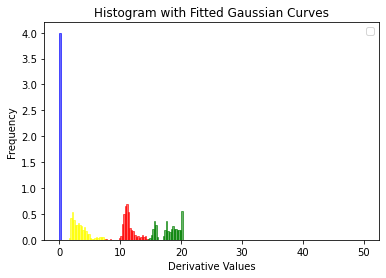

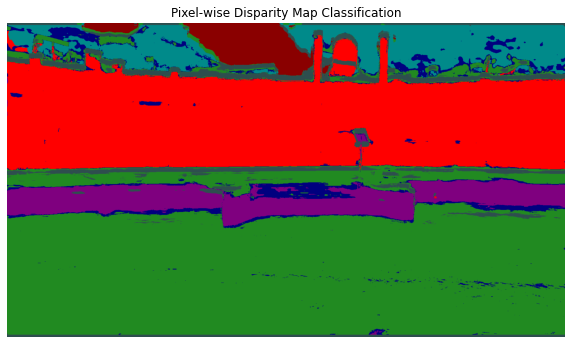

In [85]:
# SAMME KODE SOM OVER 


def clusteringVerticalSurfaces(flattened_derivatives, guess1=[0.0], guess2=[3], guess3=[7], guess4=[10], a_mini=-0.3, a_maxi=20, clusters=4, onlyThree=False):
    # Clipping the data to be between -0.3 and 0.5
    clipped_derivatives = np.clip(flattened_derivatives, a_min=a_mini, a_max=a_maxi)

    # Reshape data for KMeans
    clustering_model = clipped_derivatives.reshape(-1, 1)
    
    # Initial guesses for cluster centers (approximated from histogram peaks)
    if(onlyThree):
        initial_centers = np.array([guess1, guess2, guess3])
        clusters = 3
    else: 
        initial_centers = np.array([guess1, guess2, guess3, guess4])  # replace peak1, peak2 with your estimates

    # Perform K-means clustering
    #kmeans = KMeans(n_clusters=clusters, init=initial_centers,n_init=2)
    kmeans = KMeans(n_clusters=clusters, init='k-means++', n_init='auto')
    kmeans.fit(clustering_model)

    # Get the labels and cluster centers
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    return clustering_model, clipped_derivatives, labels, centers


doOnlyThree = False
clustering_model, clipped_derivatives, labels, centers = clusteringVerticalSurfaces(vertical_Disp_List, onlyThree = doOnlyThree)

# Separate the data into two clusters
cluster1 = clustering_model[labels == 0]
cluster2 = clustering_model[labels == 1]
cluster3 = clustering_model[labels == 2]
if(not doOnlyThree):
    cluster4 = clustering_model[labels == 3]


# Plot histogram and Gaussian curves
plt.figure()
plt.hist(cluster1, bins=200, range=(0, 50), density=True, alpha=0.6, color='blue', edgecolor='blue')
plt.hist(cluster2, bins=200, range=(0, 50), density=True, alpha=0.6, color='red', edgecolor='red')
plt.hist(cluster3, bins=200, range=(0, 50), density=True, alpha=0.6, color='green', edgecolor='green')
if(not doOnlyThree):
    plt.hist(cluster4, bins=200, range=(0, 50), density=True, alpha=0.6, color='yellow', edgecolor='yellow')
#plt.plot(x_values, gaussian_curve1, label='Gaussian 1')
#plt.plot(x_values, gaussian_curve2, label='Gaussian 2')
plt.xlabel('Derivative Values')
plt.ylabel('Frequency')
plt.title('Histogram with Fitted Gaussian Curves')
plt.legend()
plt.show()

#----------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Create classmap
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------


for i, obj in enumerate(vertical_Obj_List):
    if(labels[i] == 0):
        obj[3] = "vertical1"
    elif(labels[i] == 1):
        obj[3] = "vertical2"
    elif(labels[i] == 2):
        obj[3] = "vertical3"
    else:
        obj[3] = "vertical4"

new_class_map = np.copy(classification_map)

for i, obj in enumerate(vertical_Obj_List):
    i = obj[1]
    j= obj[2]
    new_class_map[i,j] = obj[3]


Dark_Red = [139/256, 0,0]
Pure_red = [1,0,0]
Olive_Green = [85/256, 107/256,47/256]
Navy_Blue= [0, 0,128/256]
Dark_Slate_Gray=[47/256, 79/256, 79/256]
Chocolate= [210/256, 105/256, 30/256]
Saddle_Brown= [139/256, 69/256, 19/256]
Firebrick =[178/256, 34/256, 34/256]
Dark_Goldenrod=[184/256, 134/256, 11/256]
Midnight_Blue=[25/256, 25/256, 112/256]
Indigo =[75/256, 0, 130/256]
Teal=[0, 128/256, 128/256]
Forest_Green=[34/256, 139/256, 34/256]
Sienna=[160/256, 82/256, 45/256]
Dark_Cyan=[0, 139/256, 139/256]
Purple = [128/256,0 , 128/256]


# Define colors for each classification
colorsV3 = {
    'vertical1': Dark_Red,  # Navy blue  
    'vertical2': Pure_red,  # Pure red
    'vertical3': Purple,  # Purple
    'vertical4': Dark_Cyan,  # Cyan
    'horizontal': Forest_Green,  # Green
    'unknown': Dark_Slate_Gray,  # Gray
    'undecided': Navy_Blue

}


# Create an empty array for the color-coded image
color_coded_image = np.zeros((*new_class_map.shape, 3))
#print(color_coded_image)


color_coded_image = np.zeros((*new_class_map.shape, 3))

# Assign colors based on the classification in new_class_map
for label, color in colorsV3.items():
    # Find indices where the current label is present in new_class_map
    indices = np.where(new_class_map == label)
    # Assign the corresponding color to these indices in the color-coded image
    color_coded_image[indices] = color

#print(color_coded_image)
plt.figure(figsize=(10, 6))
plt.imshow(color_coded_image)
plt.title('Pixel-wise Disparity Map Classification')
plt.axis('off')  # Hide the axes
plt.show() 